# Python, Jupyter Notebooks, and Plotting

Rebekah Esmaili [bekah@umd.edu](mailto:bekah@umd.edu)

STC / NOAA / University of Maryland

Code, Data, and Installation Guide: [https://ter.ps/agupy](https://ter.ps/agupy)

---

![](img/xkcd-python.png)


__Workshop Agenda__

* 7:30am	Meet and greet/computing environment set-up
* 8:00am	Importing and displaying data with Python and Jupyter Notebooks
* 9:30am	Understanding and viewing to scientific data formats
* 10:00am	Performing common remote sensing tasks with Python
* 12:00am	Version control and best coding practices
* 12:20pm	Adjourn

---

## Why Python?

Pros

* General-purpose, cross-platform  
* Free and open source  
* Resaonably easy to learn, good statistical and visualization packages/modules  
* Forces good syntax  
* Reads satellite data formats like HDF, NetCDF, GRIB 


Cons

* Performance penalties for interpretted languages  
* Packages are a "black box" and can be discontinued  

---

## Objective: working with satellite datasets

* You won't learn how to code in Python
* You will learn to:
	* Read/write ascii data
	* Basic plotting and visualization
	* Perform data filtering
    
---

Python is an interpretted language, so you as minimum you need to have Python on your computer.

## What is Anaconda?

* Anaconda is a package manager
* Comes bundled with Python, a lot of useful scientific/mathematical packages, and development environments.
* Easiest place to start if you new

## Development environments

* Spyder: most Matlab-like
* Jupyter notebooks: web based. Similar to Mathematica, runs code inline
* Text editor + run with command line for scripting

---
## Launching Jupyter Notebook

### Mac

* Open Anaconda Navigator and click on Jupyter Notebook


### Linux

* Open terminal, and type:
```
jupyter notebook    
```

### Windows

* Start &rarr; Anaconda3 &rarr; Jupyter Notebook

---

## Launching Jupyter Notebook

* This will launch your default web browser with a local webserver that displays the contents of the directory that you're working in. 

* Click on New on the top right.

![](img/jn-screenshot.png)

<div class="alert alert-block alert-info">

<b> Exercise 1: Set-up your environment and create a notebook </b>

* For your opertating system, launch Jupyter Notebooks
* Create a new notebook
* Change the name from "untitled" to something better
* Save in the __same directory as the data folder__ that we provided (or move the data directory to the same place at the file because we'll need it later!).

</div>

## Very basic python commands

In [25]:
# This is a comment
print("hello world")

hello world


In [26]:
# This is an array 
a = [1,2,3,4,5,6]

In [27]:
# This will show me the array 
print(a)

[1, 2, 3, 4, 5, 6]


In [28]:
# So will this test
a

[1, 2, 3, 4, 5, 6]

In [29]:
# Is this what you expected to happen?
a*2

[1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6]

## Importing Packages
Packages give us additional functionality, saving us the trouble of writing procedures ourselves. There are ~6000 packages in the [conda-forge repository](https://anaconda.org/conda-forge/repo) alone!

Today we'll discuss:

* [NumPy](http://www.numpy.org/) Fast mathematical operations on large datasets.
* [Pandas](https://pandas.pydata.org) Encapsulation of data, easy read/write of ascii data. Builds extra functionality on top of NumPy.
* [Matplotlib](https://matplotlib.org) Primarily python plotting/visualization package. You can generate plots, histograms, scatterplots, etc., with just a few lines of code.

In [30]:
import numpy as np

### NumPy

* Defining Arrays
* Array operations

In [31]:
# Array operations
a = np.array(a)
b = a.reshape(3,2)
b

array([[1, 2],
       [3, 4],
       [5, 6]])

In [32]:
# Sum along rows
b.sum()

21

In [33]:
# Get the minimum value along columns
b.min(axis=0)

array([1, 2])

In [34]:
# Boolean operations
b>1

array([[False,  True],
       [ True,  True],
       [ True,  True]])

For more examples, work through the: [Numpy Quickstart](https://docs.scipy.org/doc/numpy/user/quickstart.html)

### Pandas
* A library that helps encapsulate data
* Comparable to data frames in R, structures in IDL, namespaces in C++ and modern Fortran

Pros:

* You can name columns and refence by labels instead of indices like in numpy arrays
* This also makes performing group operations easier and more readable

Cons:

* Pandas is a wrapper for NumPy, so there is some efficiency overhead
* NumPy arrays are better for referencing datasets > 2D

---

### Looking at real in-situ data: AERONET
* Aerosols are particles suspended in the atmosphere, including dust, sea salt, volcanic ash, smoke, and pollution.
* Aerosol Optical Depth (AOD) is a unitless measure of the amount of aerosols in the atmosphere.
* AERONET (AErosol RObotic NETwork) stations provide in-situ AOD observations.

In [35]:
import pandas as pd

In [36]:
fname = 'data/aeronet_locations_v3.txt'
stationList = pd.read_csv(fname, skiprows=1)

In [37]:
# Show column names - kind of ugly
print(list(stationList))

['Site_Name', 'Longitude(decimal_degrees)', 'Latitude(decimal_degrees)', 'Elevation(meters)']


In [38]:
# Make easier to write
stationList.columns = ['site', 'lon', 'lat', 'elev']

# List the first few rows
stationList[0:5]

,site,lon,lat,elev
0,Cuiaba,-56.070214,-15.555244,234.0
1,Alta_Floresta,-56.104453,-9.871339,277.0
2,Jamari,-63.068552,-9.199070,129.0
3,Tucson,-110.953003,32.233002,779.0
4,GSFC,-76.839833,38.992500,87.0


<div class="alert alert-block alert-info">

<b>Exercise 2: Import an ascii file </b>

* From the data folder, import "20180801_20180831_PNNL_lev15.csv" using the pandas read_csv command. Assign it to a variable.
    * HINT: You might need to check out the file path with respect to your notebook location.
* What are the column names?
</div>

### Basic Plotting with MatplotLib

Common (simple) tasks in NOAA operations...

* Histograms
* Time series
* Taking averages, computing the bias

In [39]:
# Matplotlib
from matplotlib import pyplot as plt

# Options to print figures into notebook/increase size
# Only necessary for jupyter notebooks
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams.update({'font.size': 16})

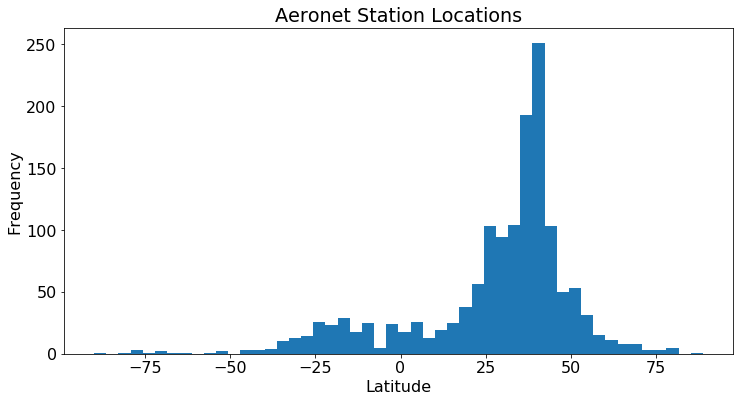

In [40]:
# Create a histogram with 50 bins
plt.hist(stationList["lat"], bins=50)
plt.title("Aeronet Station Locations")
plt.ylabel("Frequency")
plt.xlabel("Latitude")
plt.show()

#### Time series data

Need to tell python the date strings in the file are dates/times.

In [41]:
groundStationPNNL = pd.read_csv('data/20180801_20180831_PNNL_lev15.csv')

In [42]:
# Convert the string dates and times to date format (Note: \ continues to new line)
groundStationPNNL['datetime'] = groundStationPNNL['Date(dd:mm:yyyy)'] + \
' ' + groundStationPNNL['Time(hh:mm:ss)']

# Explicitly declare the format (for the full list, see http://strftime.org)
fmt = '%d:%m:%Y %H:%M:%S'
groundStationPNNL['datetime'] = \
pd.to_datetime(groundStationPNNL['datetime'], format=fmt)

#### Plotting a single variable

* Add the data using plt.plot(x='X Column Name', y='Y Column Name')

<div class="alert alert-block alert-info">

**Exercise 3**


??? = Fill in the blank!


**Create a histogram**

* Import the aeronet station list and locations from the file aeronet_locations_v3.txt using the pandas read_csv command.
* Plot a histogram of the longitude distribution of stations using the ???.hist(???) command

**Challenge: Create a time series plot**

* Import time series data from 20180801_20180831_PNNL_lev15.csv.
* Create a new column in the dataframe with a string that combines the dates and times
* Convert the string of dates and times to datetime format using the pandas to_datetime command. 
    * Note: Explicitly specify the format of the dates and times in the string for pandas to parse.
* Use the ???.plot(x=???, y=???) to create a plot.
</div>

#### Plotting two side-by-side plots

* Before writing your plt.plot code, add:
plt.subplot( __row number__ , __column number__ , __position of the plot__ )

* Call plt.plot() and fill in the x and y variables for the first line/data series on the plot
* Call plt.sunplot again, increment the position of plot number
* Add in any aesthetics, such as rotating the axes, labels, and adding a legend
* Show the plot using plt.show()

Example: 
* plt.subplot(2,1,1) places the plot in the first position of a two row, one column stack of plots.
* plt.subplot(1,2,2) places the plot in the second position of a two column, one row of plots next to each other.

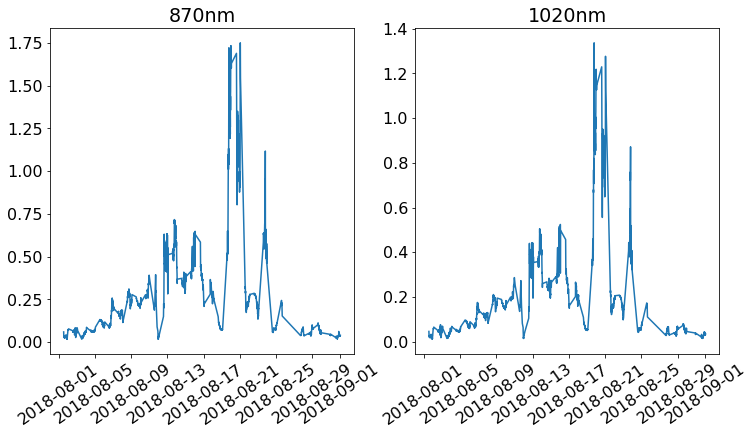

In [43]:
# Call the subplot - in column one, write the AOD_870nm plot
plt.subplot(1,2,1)

plt.plot(groundStationPNNL.datetime, groundStationPNNL.AOD_870nm)
plt.xticks(rotation=35)
plt.title('870nm')

# Call the subplot - in column one, write the AOD_1020nm plot
plt.subplot(1,2,2)
plt.plot(groundStationPNNL.datetime, groundStationPNNL.AOD_1020nm)
plt.xticks(rotation=35)
plt.title('1020nm')

plt.show()

#### Adding data to an existing plot

* Call plt.plot() and fill in the x and y variables for EACH line/data series on the plot
* Add in any aesthetics, such as rotating the axes, labels, and adding a legend
* Show the plot using plt.show()

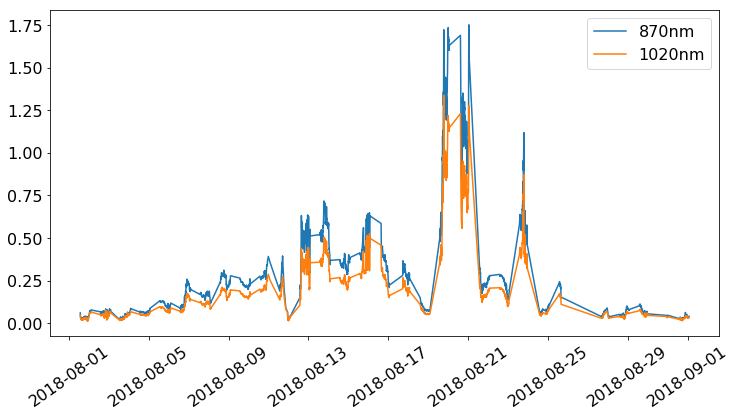

In [44]:
# Question: How to I make separate plots?
plt.plot(groundStationPNNL.datetime, groundStationPNNL.AOD_870nm)
plt.plot(groundStationPNNL.datetime, groundStationPNNL.AOD_1020nm)
plt.xticks(rotation=35)
plt.legend(['870nm', '1020nm'])
plt.show()

#### Filtering Data
Sometimes there are values we don't want in our plots, e.g. missing data values of -999.0

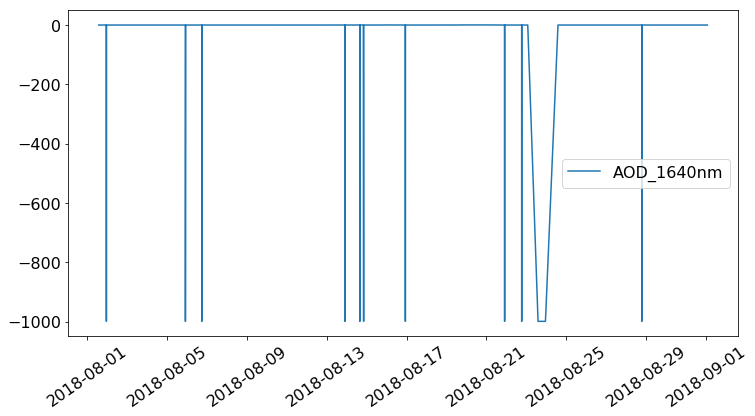

In [45]:
# The following plot is not very useful because the missing values are being added..
plt.plot(groundStationPNNL.datetime, groundStationPNNL.AOD_1640nm)
plt.xticks(rotation=35)
plt.legend()
plt.show()

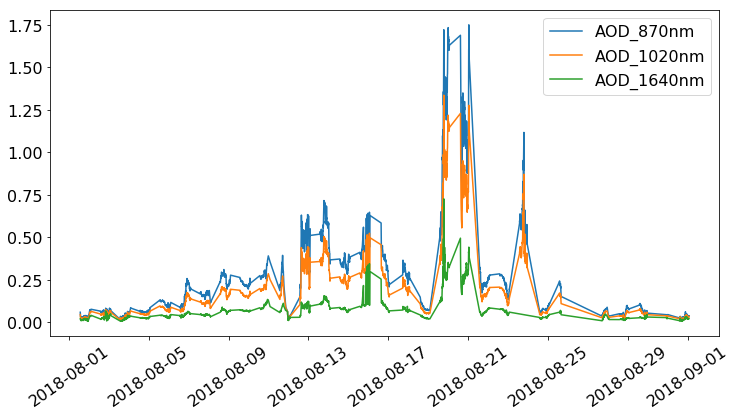

In [46]:
plt.plot(groundStationPNNL.datetime, groundStationPNNL.AOD_870nm)
plt.plot(groundStationPNNL.datetime, groundStationPNNL.AOD_1020nm)

# Filter out missing values by only using aeronetStaPNNL['AOD_1640nm'] > 0
keepRows = groundStationPNNL['AOD_1640nm'] >= 0
plt.plot(groundStationPNNL[keepRows].datetime, groundStationPNNL[keepRows].AOD_1640nm)
plt.legend()
plt.xticks(rotation=35)

plt.show()

### Saving images

* You can right click and save
* Add plt.savefig('pick_a_filename')

In [47]:
plt.hist(stationList["lat"], bins=100)
plt.title("Aeronet Station Locations")
plt.ylabel("Frequency")
plt.xlabel("Latitude")

# Add DPI option to change resolution of the plot (maintains the same aspect ratio)
plt.savefig("histogram", dpi=200)
plt.close()

## Resources

* Some (free!) ways to learn: 
    * [CS Dojo](https://www.youtube.com/watch?v=Z1Yd7upQsXY&list=PLBZBJbE_rGRWeh5mIBhD-hhDwSEDxogDg) Youtube series for absolute beginners
    * [Automate boring stuff](https://automatetheboringstuff.com)
    * [Codeacademy](https://www.codecademy.com/learn/learn-python)
    * [Local Meetups](https://www.meetup.com/find/tech/)
    * Start a Python Club!